********************************************************************
CLUSTERING OF DATASET
********************************************************************
This is the famous Iris dataset and serves as an easy benchmark for evaluation. Test your K-Means Algorithm on this easy dataset with 4 features:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
and 150 instances.

Essentially assign the 150 instances in the test file to 3 cluster ids given by 1, 2 or 3. The leaderboard will output the V-measure and this benchmark can be used as an easy step for the main HW3.
The training data is a NULL FILE.
The file iris_new_data.txt, under "Test data," contains the data you use for clustering.
The format example is given by iris_format.txt.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt, floor
from scipy.spatial.distance import sqeuclidean,minkowski,euclidean,correlation,cosine

In [9]:
def readTrainfile(filepath):
    read_data = pd.read_csv(filepath, names=['sepal_length', 'sepal_width','petal_length','petal_width'], sep=' ',header=None)
    return read_data

In [10]:
inputData =readTrainfile("iris_new_data.txt")
inputData.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [11]:
inputData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


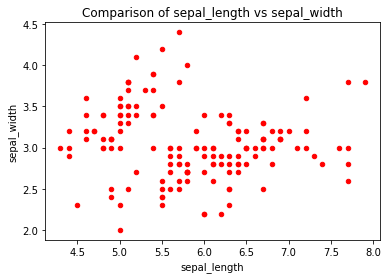

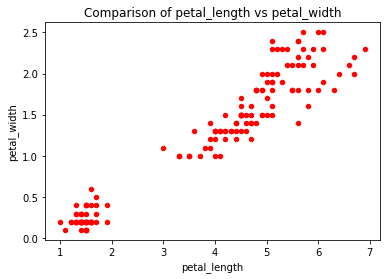

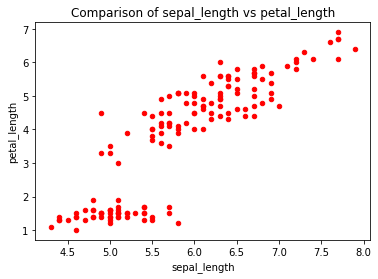

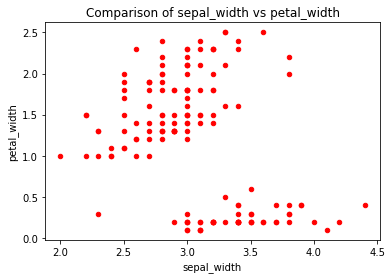

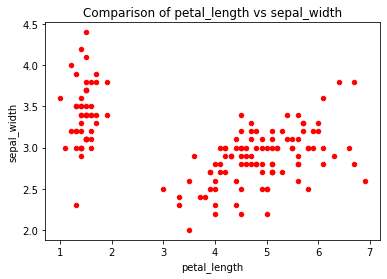

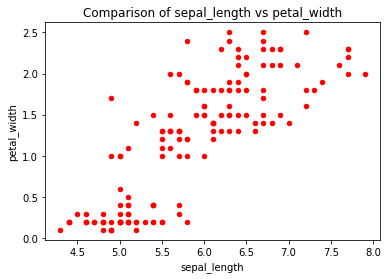

In [12]:
inputData.plot(kind="scatter", x="sepal_length", y="sepal_width", title="Comparison of sepal_length vs sepal_width",color="red")
inputData.plot(kind="scatter", x="petal_length", y="petal_width", title="Comparison of petal_length vs petal_width",color="red")
inputData.plot(kind="scatter", x="sepal_length", y="petal_length", title="Comparison of sepal_length vs petal_length",color="red")
inputData.plot(kind="scatter", x="sepal_width", y="petal_width", title="Comparison of sepal_width vs petal_width",color="red")
inputData.plot(kind="scatter", x="petal_length", y="sepal_width", title="Comparison of petal_length vs sepal_width",color="red")
inputData.plot(kind="scatter", x="sepal_length", y="petal_width", title="Comparison of sepal_length vs petal_width",color="red")
plt.show()

In [13]:
#Normalization of the inputdata
data = inputData.copy()
data.iloc[:, [0, 1, 2, 3]] = MinMaxScaler().fit_transform(data.iloc[:, [0, 1, 2, 3]])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.388889,1.000000,0.084746,0.125000
1,0.333333,0.916667,0.067797,0.041667
2,0.250000,0.875000,0.084746,0.000000
3,0.416667,0.833333,0.033898,0.041667
4,0.305556,0.791667,0.118644,0.125000


In [335]:
def initailzingCentroid_sum(data, k):
    n = np.shape(data)[1]
    m = np.shape(data)[0]
    centroids = np.mat(np.zeros((k,n)))
    dataCopy=data.copy()
    # add all the elements of each row and add as column and replace the original dataset and sort
    composite = np.mat(np.sum(dataCopy, axis=1))
    dataCopy = np.append(composite.T, dataCopy, axis=1)
    dataCopy.sort(axis=0)
    # Step value for dataset sharding
    step = floor(m/k)
    # k-1 equals the number of rows in the matrix (so that there are k matrix shards)
    #To derive means, add the columns of shards together; these columnar means are centroids.
    for j in range(k):
        if j == k-1:
            sums= np.sum(dataCopy[j*step:,1:], axis=0)
            centroids[j:] = (sums/step)
        else:
            sums= np.sum(dataCopy[j*step:(j+1)*step,1:], axis=0)
            centroids[j:] = (sums/step)
    return centroids
def cluster_change_array(k,data,centroids,record,dist):
    minimum_distance = np.inf
    minimum_index = -1
    # Calculate distances using distance function passed 
    for clusterNo in range(k):
        distance = dist(centroids[clusterNo,:], data[record,:])
        if distance < minimum_distance:
            minimum_distance = distance
            minimum_index = clusterNo
    return minimum_distance,minimum_index

def update_centroid_array(k,clusters,data,centroids):
    # Update centroid location taking mean per cluster
    for value in range(k):
        idx = [i for i, n in enumerate(clusters) if n[0,0] == int(value)]
        centroids[value] = np.mean(data.iloc[idx], axis=0)
    return centroids
def calculate_SSE(clusters):
    sse = 0
    for i in range(len(clusters)):
        sse += clusters[i,1]
    return sse
def K_Means_Algo_Array(data, k, no_of_records, centroids,dist,output):
    clusters = np.mat(np.zeros((no_of_records, 2)))
    flag = True
    no_of_iterations = 0
    #Setting flag to check if value has changed for the centroids
    while flag:
        flag = False
        # for each record in the dataset
        for record in range(no_of_records):
            minimum_distance,minimum_index=cluster_change_array(k,data,centroids,record,dist)
            # break if cluster assignment  have not changed
            if clusters[record, 0] != minimum_index: 
                flag = True
            #cluster Assignment 
            clusters[record, :] = minimum_index, pow(minimum_distance,2)
        centroids=update_centroid_array(k,clusters,data,centroids)
        no_of_iterations += 1
        if(output):
            print("\tCentroid :",no_of_iterations,"\t\n",centroids)
    return {'centroids' :centroids, 'clusters':np.squeeze(np.asarray(clusters[:,0])).astype(np.int64) + 1, 'sse':calculate_SSE(clusters)} 
    
def evaluate_k_means_sum_cen(data,k,plot,dist,output,graphtitle):
    if(output):
        print(dist)
    no_of_records = np.shape(data)[0]
    centroids=initailzingCentroid_sum(data, k)
    initial_centroid=centroids.copy()
    results= K_Means_Algo_Array(data, k, no_of_records, centroids,dist,output)
    centroids=results['centroids']
    clusters=results['clusters']
    SSE=results['sse']
    if(plot):
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(111, projection='3d')
        x_axis=data.iloc[:, [0,1,2]].values.copy()
        plt.scatter(x_axis[clusters == 1,0], x_axis[clusters == 1,1], s = 100, c = 'purple', label = '1')
        plt.scatter(x_axis[clusters == 2,0], x_axis[clusters == 2,1], s = 100, c = 'orange', label = '2')
        plt.scatter(x_axis[clusters == 3,0], x_axis[clusters == 3,1], s = 100, c = 'green', label = '3')
        if(k>=4):
            plt.scatter(x_axis[clusters == 4,0], x_axis[clusters == 4,1], s = 100, c = 'blue', label = '4')
        if(k>=5):
            plt.scatter(x_axis[clusters == 5,0], x_axis[clusters == 5,1], s = 100, c = 'pink', label = '5')
        plt.scatter(centroids[:, 0], centroids[:,1], s = 110, c = 'red', label = 'Centroids', alpha=0.8,marker="X")
        plt.scatter(initial_centroid[:, 0], initial_centroid[:,1], s = 110, c = 'black', label = 'Initial Centroid',marker="X")
        plt.title(graphtitle)
        plt.legend()
    return SSE,clusters

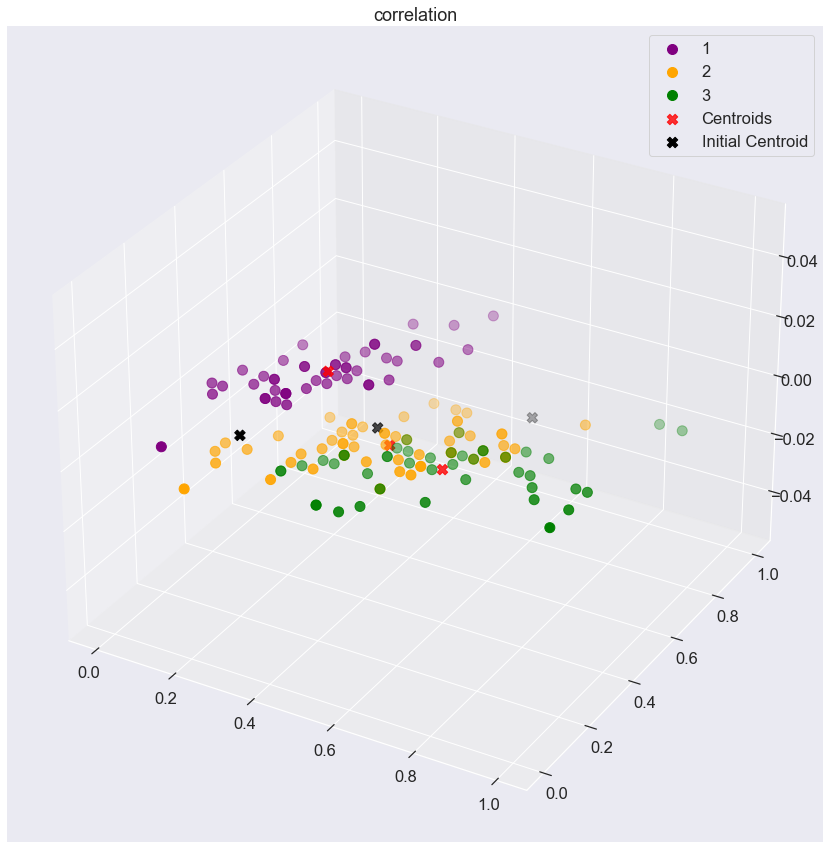

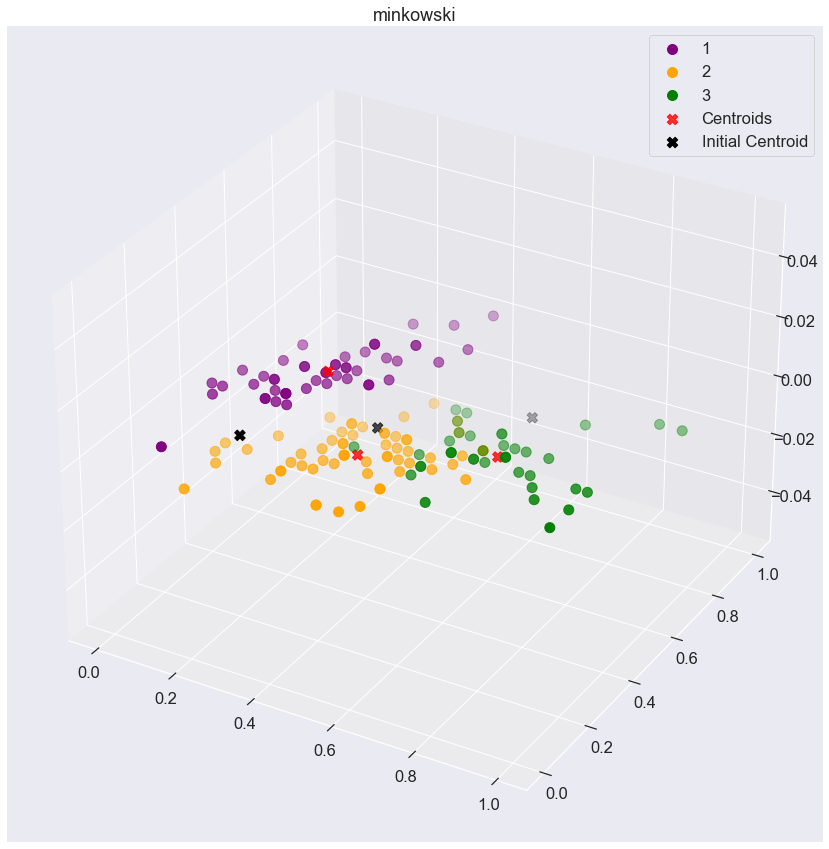

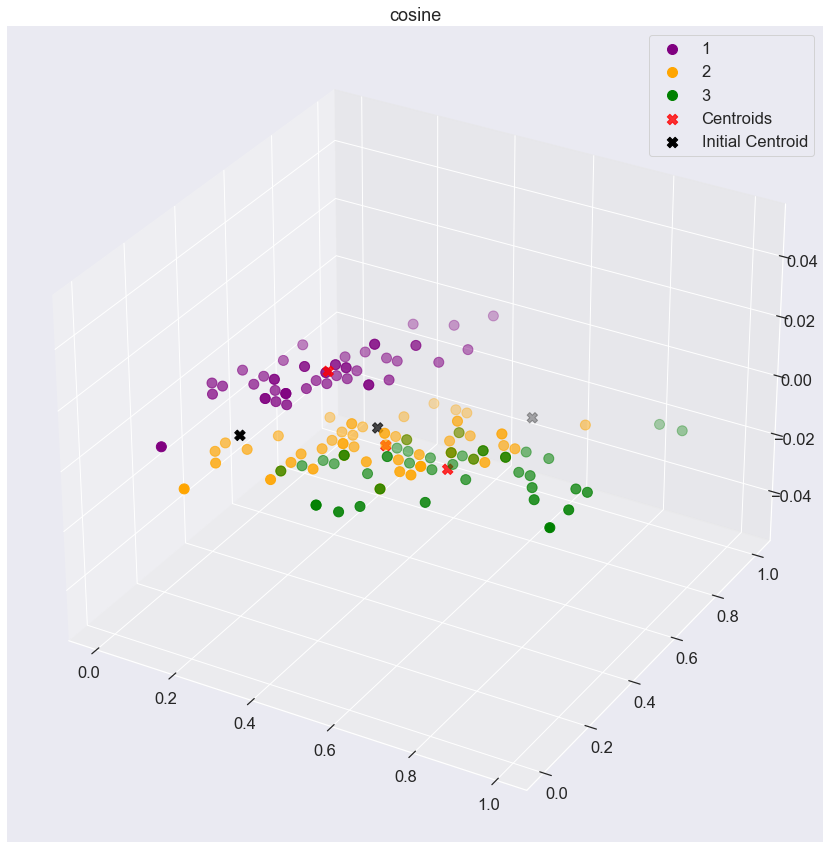

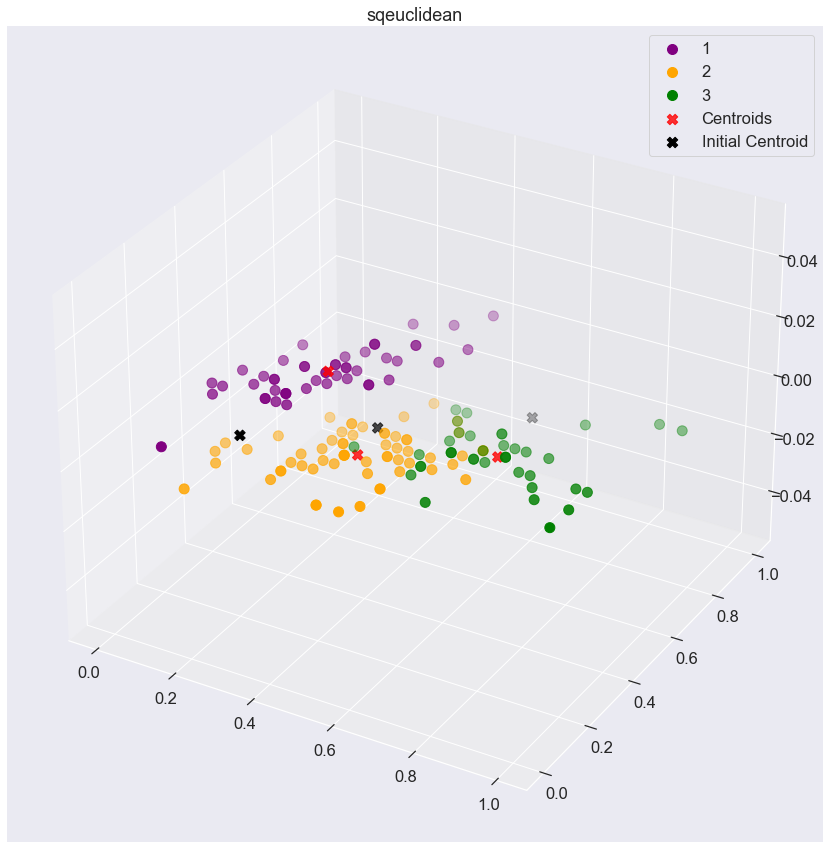

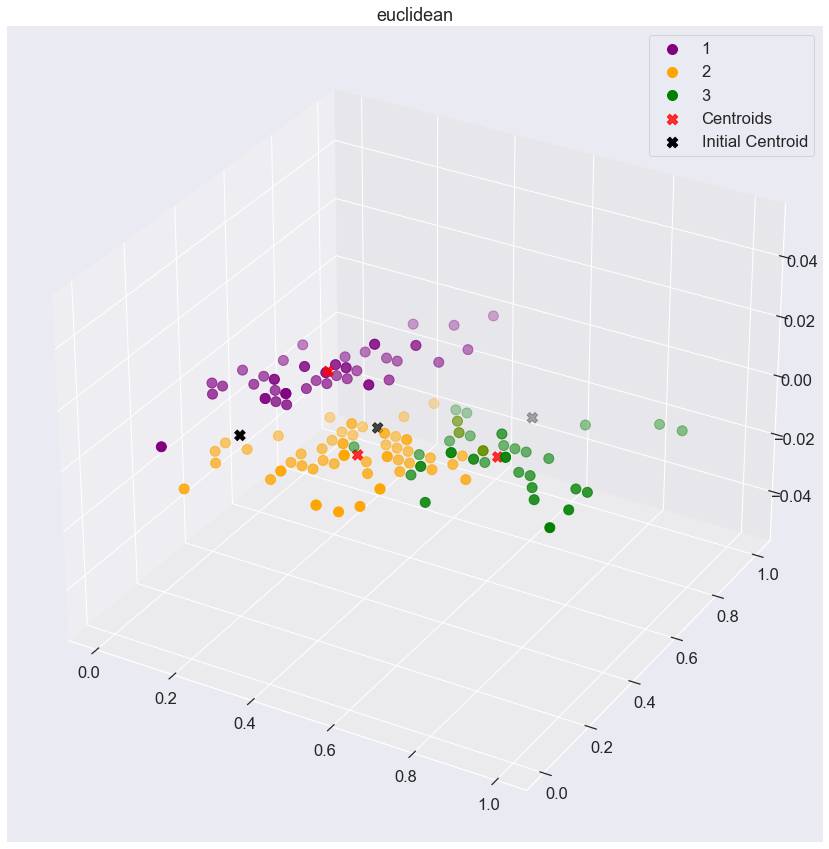

In [326]:
SSECorrelation, ClustersCorrelation = evaluate_k_means_sum_cen(data, 3, True,correlation,False,"correlation")
SSEMinkowski, ClustersMinkowski = evaluate_k_means_sum_cen(data, 3, True,minkowski,False,"minkowski")
SSECosine, ClustersCosine = evaluate_k_means_sum_cen(data, 3, True,cosine,False,"cosine")
SSESqeuclidean, ClustersSqeuclidean = evaluate_k_means_sum_cen(data, 3, True,sqeuclidean,False,"sqeuclidean")
SSEEuclidean, ClustersEuclidean = evaluate_k_means_sum_cen(data, 3, True,euclidean,False,"euclidean")


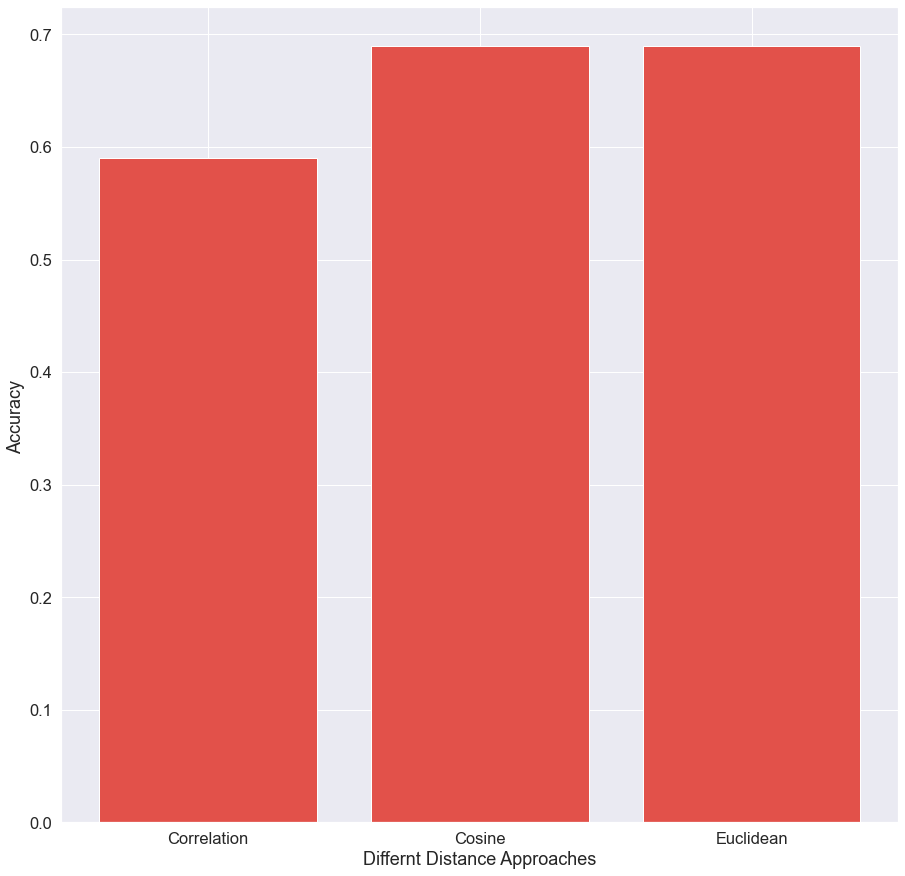

In [338]:
dcc=dict()

dcc["Euclidean"]= 0.69
dcc["Correlation"]= 0.59
dcc["Cosine"]= 0.69
lists = sorted(dcc.items()) 
x, y = zip(*lists)
fig = plt.figure(figsize = (15,15))
plt.ylabel("Accuracy ")
plt.xlabel("Differnt Distance Approaches")
plt.bar(x, y)
plt.show()

In [18]:
# Save the file the output file
def saveOutput(filePath, data):
    # writing to .txt
    np.savetxt(filePath, data, fmt='%s')

In [218]:
#ClustersMinkowski==ClustersSqeuclidean==ClustersEuclidean
#Upload and check: 
#ClustersCosine
saveOutput("ClustersCosine.txt",ClustersCosine)
#ClustersEuclidean
saveOutput("ClustersEuclidean.txt",ClustersEuclidean)
#ClustersCorrelation
saveOutput("ClustersCorrelation.txt",ClustersCorrelation)

In [14]:
#Logic for image processing with 
def initailzingCentroid(data, k):
    """ n = np.shape(data)[1]
    m = np.shape(data)[0]
    centroids = np.mat(np.zeros((k,n)))
    dataCopy=data.copy()
    # add all the elements of each row and add as column and replace the original dataset and sort
    composite = np.mat(np.sum(dataCopy, axis=1))
    dataCopy = np.append(composite.T, dataCopy, axis=1)
    dataCopy.sort(axis=0)
    # Step value for dataset sharding
    step = floor(m/k)
    # k-1 equals the number of rows in the matrix (so that there are k matrix shards)
    #To derive means, add the columns of shards together; these columnar means are centroids.
    for j in range(k):
        if j == k-1:
            sums= np.sum(dataCopy[j*step:,1:], axis=0)
            centroids[j:] = (sums/step)
        else:
            sums= np.sum(dataCopy[j*step:(j+1)*step,1:], axis=0)
            centroids[j:] = (sums/step)
    """
    centroids = np.mat(np.zeros((k,np.shape(data)[1])))
    for j in range(k):
        centroids[j,:] = data[np.random.randint(np.shape(data)[0])]
    return centroids

def cluster_change(k,data,centroids,record,dist):
    minimum_distance = np.inf
    minimum_index = -1
    # Calculate distances using distance function passed 
    for clusterNo in range(k):
        distance = dist(centroids[clusterNo,:], data[record,:])
        if distance < minimum_distance:
            minimum_distance = distance
            minimum_index = clusterNo
    return minimum_distance,minimum_index

def update_centroid(k,clusters,data,centroids):
    # Update centroid location taking mean per cluster
    for value in range(k):
        idx = [i for i, n in enumerate(clusters) if n[0,0] == int(value)]
        centroids[value] = np.mean(data[idx], axis=0)
    return centroids
def calculate_SSE(clusters):
    sse = 0
    for i in range(len(clusters)):
        sse += clusters[i,1]
    return sse
def K_Means_Algo(data, k, no_of_records, centroids,dist,output):
    clusters = np.mat(np.zeros((no_of_records, 2)))
    flag = True
    no_of_iterations = 0
    #Setting flag to check if value has changed for the centroids
    while flag:
        flag = False
        # for each record in the dataset
        for record in range(no_of_records):
            minimum_distance,minimum_index=cluster_change(k,data,centroids,record,dist)
            # break if cluster assignment  have not changed
            if clusters[record, 0] != minimum_index: 
                flag = True
            #cluster Assignment 
            clusters[record, :] = minimum_index, pow(minimum_distance,2)
        centroids=update_centroid(k,clusters,data,centroids)
        no_of_iterations += 1
        if(output):
            print("\tCentroid :",no_of_iterations,"\t\n",centroids)
    return {"runs":no_of_iterations,'centroids' :centroids, 'clusters':np.squeeze(np.asarray(clusters[:,0])).astype(np.int64) + 1, 'sse':calculate_SSE(clusters)} 
    
def evaluate_k_means(data,k,plot,dist,output,graphtitle):
    if(output):
        print(graphtitle)
    no_of_records = np.shape(data)[0]
    centroids=initailzingCentroid(data, k)
    initial_centroid=centroids.copy()
    results= K_Means_Algo(data, k, no_of_records, centroids,dist,output)
    centroids=np.asarray(results['centroids'])
    clusters=results['clusters']
    SSE=results['sse']
    runs=results['runs']
    initial_centroid=np.asarray(initial_centroid)
    if(plot):
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(111, projection='3d')
        x_axis=data.copy()
        plt.scatter(x_axis[clusters == 1,0], x_axis[clusters == 1,1], s = 100, c = 'b', label = '1')
        plt.scatter(x_axis[clusters == 2,0], x_axis[clusters == 2,1], s = 100, c = 'g', label = '2')
        plt.scatter(x_axis[clusters == 3,0], x_axis[clusters == 3,1], s = 100, c = 'r', label = '3')
        plt.scatter(centroids[:, 0], centroids[:,1], s = 110, c = 'k', label = 'Centroids', alpha=0.8, marker="X")
        plt.scatter(initial_centroid[:, 0], initial_centroid[:,1], s = 110, c = 'purple', label = 'Initial Centroid',alpha=0.8, marker="X")
        plt.title(graphtitle)
        plt.legend()
    return {"SSE":SSE,"clusters":clusters,"centroids":centroids,"initial_centroid":initial_centroid, "runs":runs}

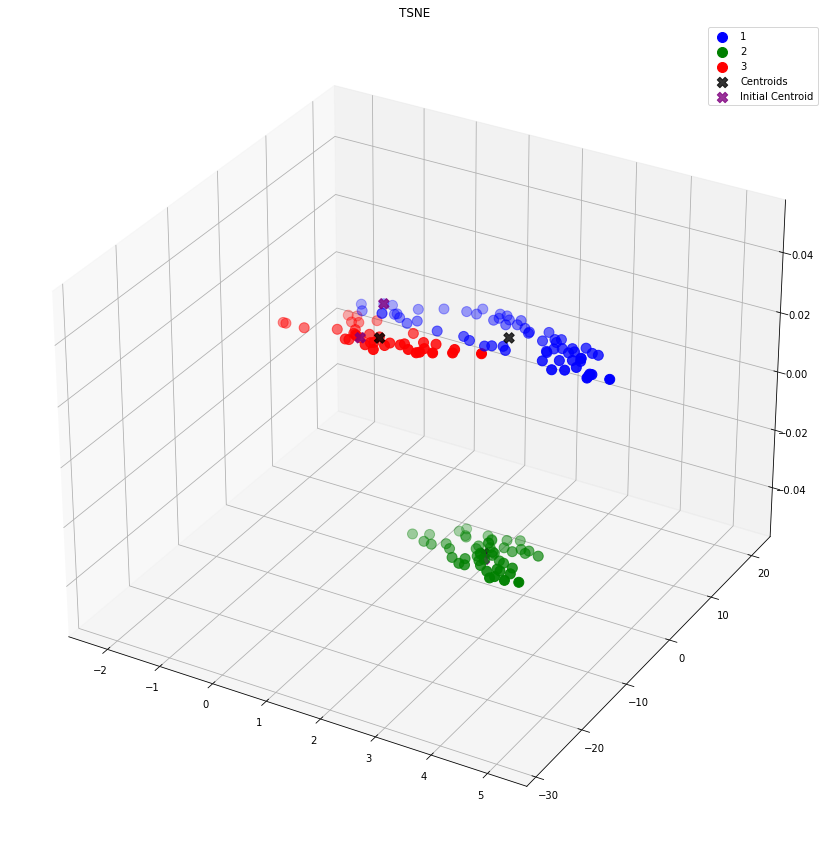

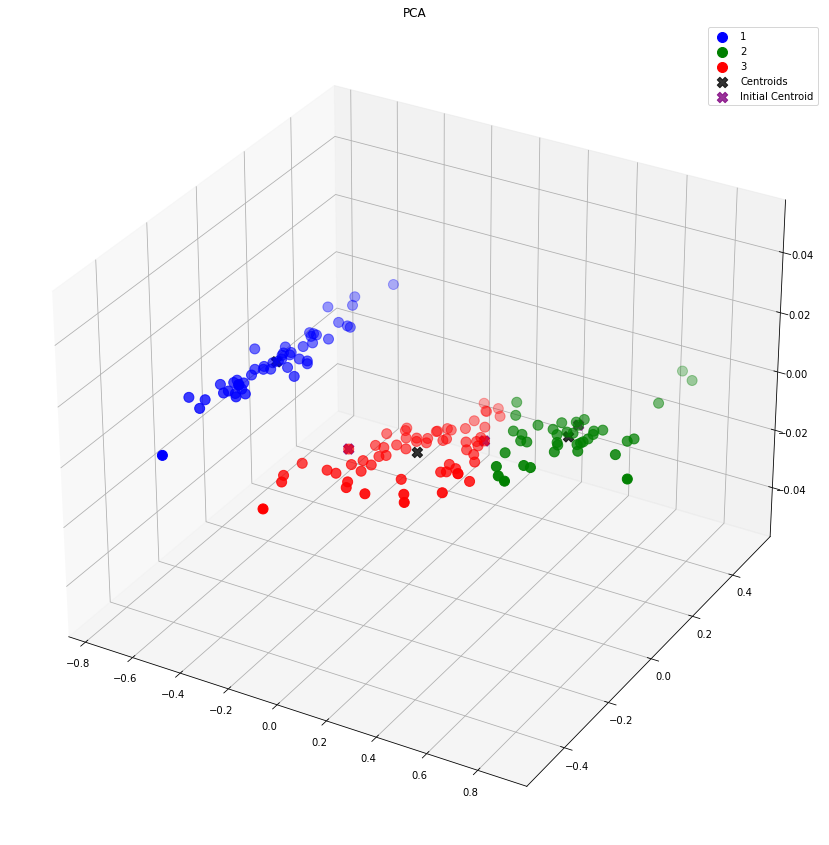

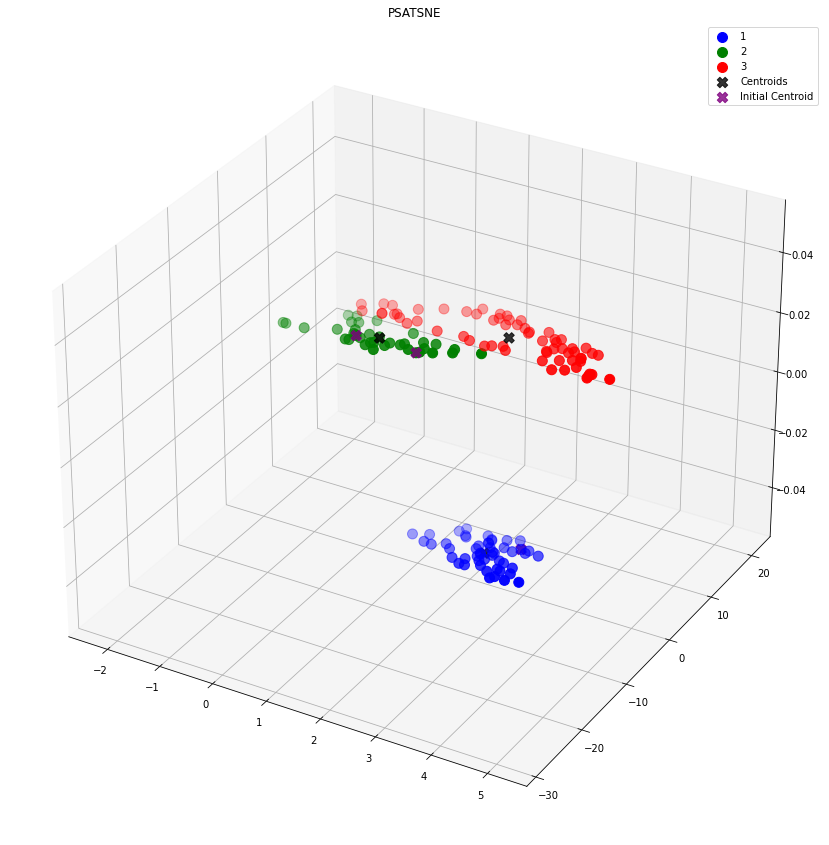

In [15]:

from sklearn.manifold import TSNE,MDS
from sklearn.decomposition import PCA, TruncatedSVD,IncrementalPCA
testDataPCA = PCA(n_components=2).fit_transform(data)
testDataTSNE = TSNE(n_components=2).fit_transform(data)
testDataPSATSNE = TSNE(n_components=2).fit_transform(testDataPCA)

result=dict()
result["TSNE"]= evaluate_k_means(testDataPSATSNE, 3, True,euclidean,False,"TSNE")
result["PCA"]= evaluate_k_means(testDataPCA, 3, True,euclidean,False,"PCA")
result["PSATSNE"]= evaluate_k_means(testDataPSATSNE, 3, True,euclidean,False,"PSATSNE")


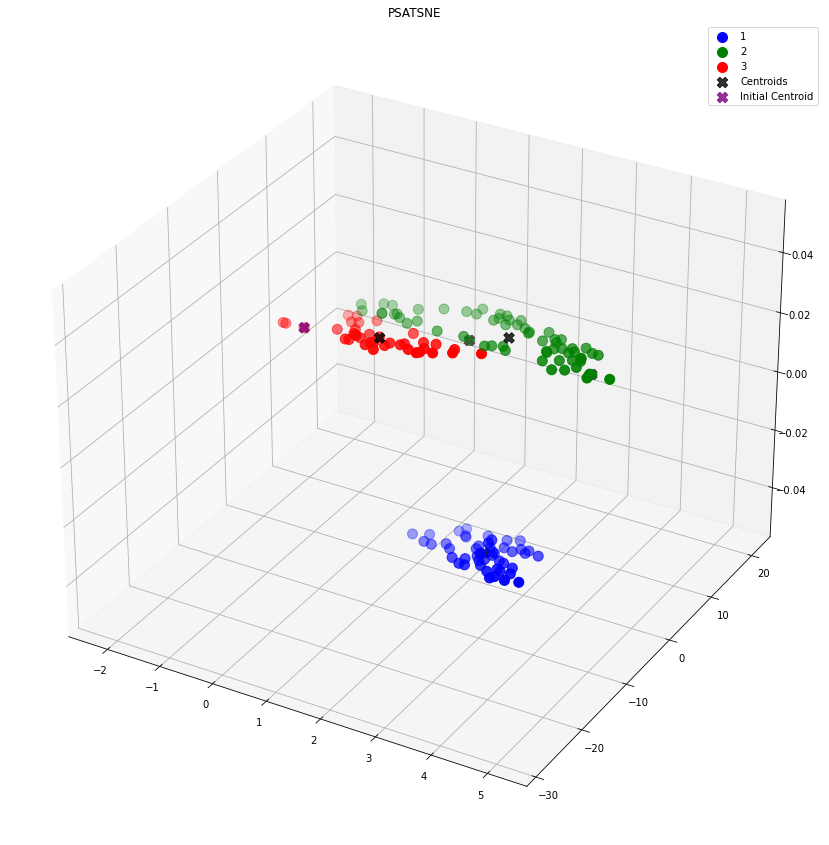

In [16]:
#Best performing metric: 
result["PSATSNE"]= evaluate_k_means(testDataPSATSNE, 3, True,euclidean,False,"PSATSNE")

In [19]:
#ClustersCorrelation
PCA=result['PCA']['clusters']
saveOutput("PCA.txt",PCA)
TSNE=result['TSNE']['clusters']
saveOutput("TSNE.txt",TSNE)
PSATSNE=result['PSATSNE']['clusters']
saveOutput("PSATSNE.txt",PSATSNE)


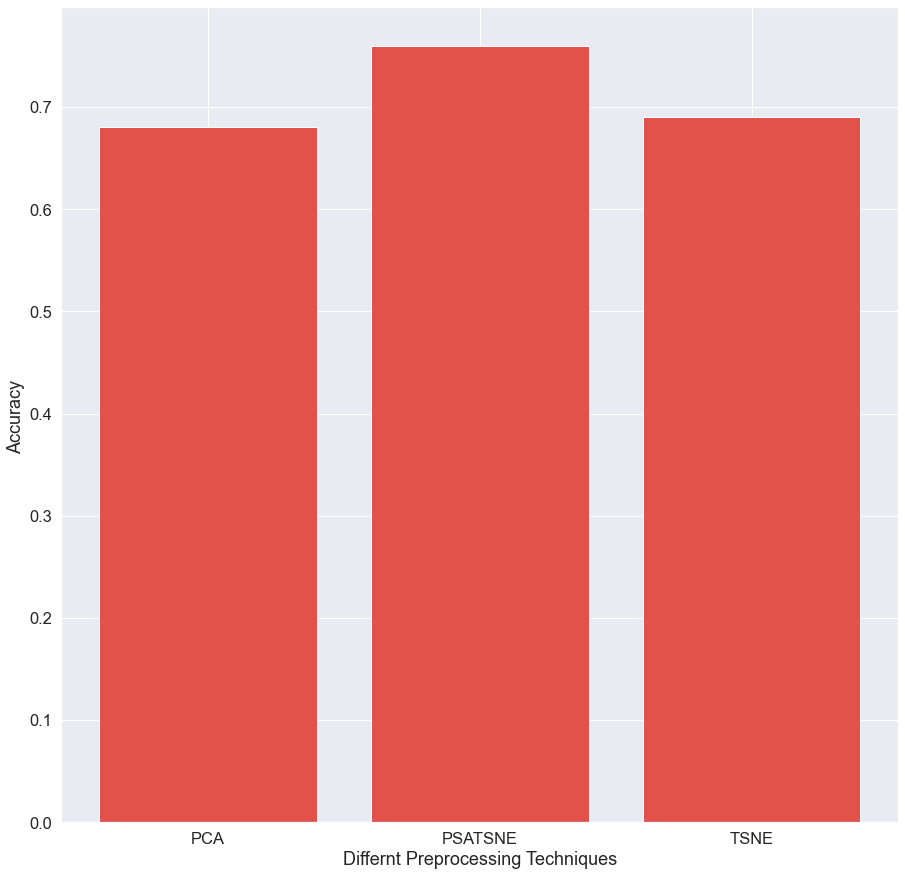

In [292]:
acc=dict()
acc["PCA"]= 0.68
acc["TSNE"]= 0.69
acc["PSATSNE"]= 0.76
lists = sorted(acc.items()) 
x, y = zip(*lists)
fig = plt.figure(figsize = (15,15))
plt.ylabel("Accuracy ")
plt.xlabel("Different Preprocessing Techniques")
plt.bar(x, y)
plt.show()


k:  1 	 SSE: 41.13817202297779
k:  3 	 SSE: 6.99811400482676
k:  5 	 SSE: 4.58075037306115
k:  7 	 SSE: 3.8596563372138295


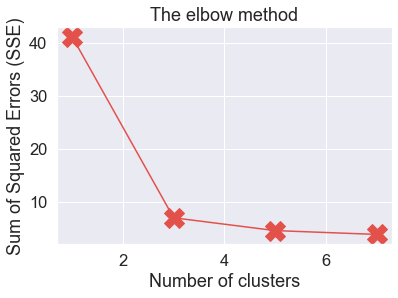

In [337]:
#Finding the optimum number of clusters for k-means classification
wcss = []
ran=range(1,8,2)
for k in ran:
    SSE, clusters  = evaluate_k_means_sum_cen(data, k, False, euclidean, False,"Testing")
    print("k: ",k,"\t SSE:",SSE)
    wcss.append(SSE)
plt.plot(ran, wcss, marker='X',markersize=20)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  

k:  1 	 SSE: 45.259585582953676
k:  3 	 SSE: 9.214545270394947
k:  5 	 SSE: 2.8955988222519213
k:  7 	 SSE: 2.3333258708451323
k:  9 	 SSE: 1.849132361144722
k:  11 	 SSE: 1.378821484866091


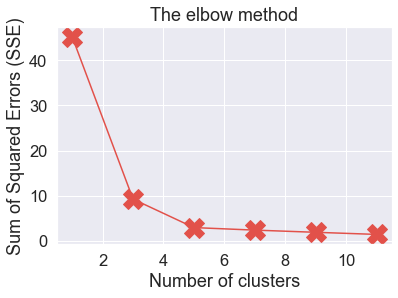

In [333]:
#Finding the optimum number of clusters for k-means classification
wcss = []
result=dict()
ran=range(1,12,2)
for k in ran:
    result[k] = evaluate_k_means(testDataPCA, k, False, euclidean, False,"Testing")
    print("k: ",k,"\t SSE:",result[k]["SSE"])
    wcss.append(result[k]["SSE"])
plt.plot(ran, wcss, marker='X',markersize=20)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  

In [344]:
result["TSNE"]['runs']

6

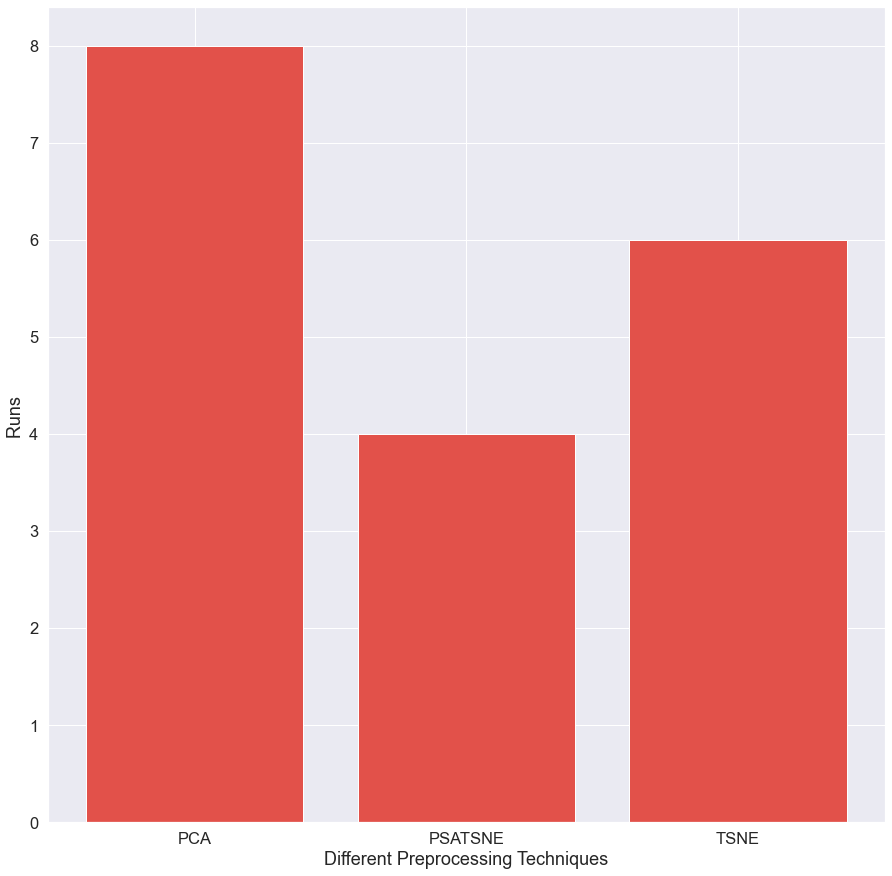

In [345]:
acc=dict()
acc["PCA"]= result["PCA"]['runs']
acc["TSNE"]= result["TSNE"]['runs']
acc["PSATSNE"]= result["PSATSNE"]['runs']
lists = sorted(acc.items()) 
x, y = zip(*lists)
fig = plt.figure(figsize = (15,15))
plt.ylabel("Runs ")
plt.xlabel("Different Preprocessing Techniques")
plt.bar(x, y)
plt.show()
